In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent = most_recent._mapping['date']
rdate = dt.datetime.strptime(most_recent, '%Y-%m-%d').date()
print(rdate)


2017-08-23


In [11]:
# Calculate the date one year from the last date in data set.
year_ago= rdate - dt.timedelta(days=365)
print(year_ago)

2016-08-23


In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Perform a query to retrieve the data and precipitation scores
last_year_pr = session.query(Measurement.date,Measurement.prcp).\
                        filter(Measurement.date >= '2016-08-23').\
                        order_by(Measurement.date).all()

last_year_pr




[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [14]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
last_year_pd = pd.DataFrame(last_year_pr)

# Sort the dataframe by date
last_year_pd = last_year_pd.sort_values(by='date').rename(columns={'prcp':'precipitation'}).set_index('date')
last_year_pd

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


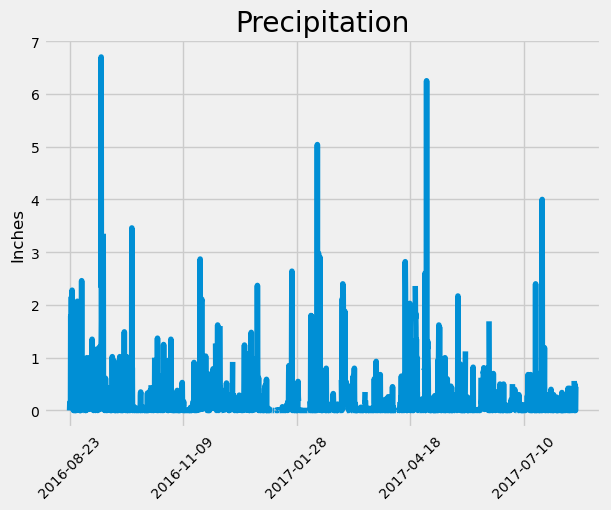

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
last_year_pd.plot(rot=45, legend=False)
plt.title("Precipitation")
plt.xlabel("")
plt.ylabel('Inches', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data
last_year_pd.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.station).count()



9

In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
st_activity= session.query(Measurement.station, func.count(Measurement.station)).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).all()
st_activity


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station = st_activity[0]._mapping['station']
station
station_temp_info = session.query(
                                func.min(Measurement.tobs),
                                func.max(Measurement.tobs),
                                func.avg(Measurement.tobs)).\
                                filter(Measurement.station == station).all()

station_temp_info


[(54.0, 85.0, 71.66378066378067)]

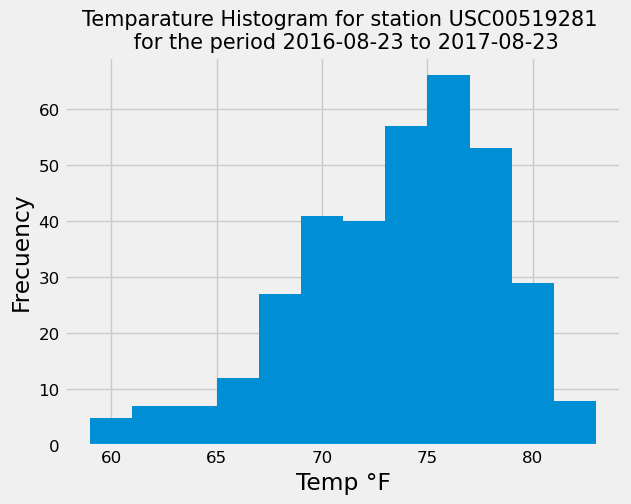

In [20]:
# Using the most active station id

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperture_station = session.query(Measurement.tobs).\
                            filter(Measurement.date >= year_ago).\
                            filter(Measurement.station == station).all()
temp_st_pd = pd.DataFrame(temperture_station, columns =['Temp'])
temp_st_pd.hist(bins=12)


plt.title(f'Temparature Histogram for station {station} \n for the period {year_ago} to {rdate}', fontsize=15)
plt.xlabel("Temp °F")
plt.ylabel('Frecuency')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

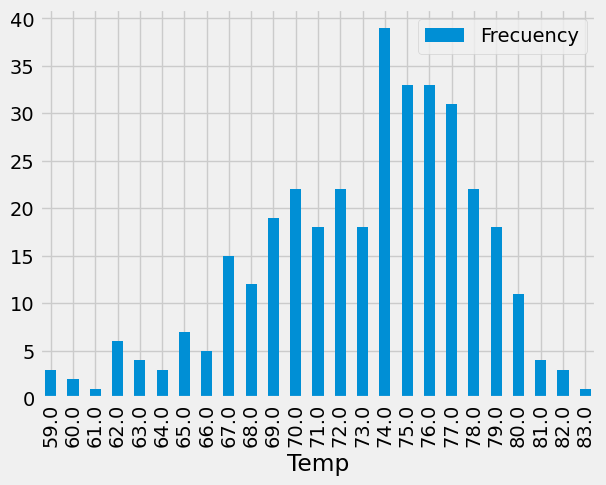

In [22]:
# Another way of visualize it
temperture_station = session.query(Measurement.tobs,func.count(Measurement.tobs)).\
                            group_by(Measurement.tobs).\
                            filter(Measurement.date >= year_ago).\
                            filter(Measurement.station == station).all()

temp_st_pd = pd.DataFrame(temperture_station, columns =['Temp','Frecuency'])
temp_st_pd.plot(kind='bar',x='Temp', y='Frecuency')
plt.show()

# Close Session

In [23]:
# Close Session
session.close()